<a href="https://colab.research.google.com/github/Virzlauvinen/Procesamiento-de-Lenguaje-Natural/blob/main/Z__PLN_Proyecto_Final_Nube_de_palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/


Utilizaremos la librería python NLTK para NLP
haremos uso de varias funciones y análisis de ML (No Deep Learning)

1. Obtener los Datos (los cuentos)
2. Limpieza de datos
4. Análisis Exploratorio
5. Análisis de Sentimiento
6. Modelado de Tópicos

# 1 - LEVANTAMOS LOS .TXT
- Cargamos los archivos txt
- Lo pasamos a una estructura en un dataframe de Pandas para seguir usando en el próximo paso.

In [2]:
!pwd
%cd /content/drive/MyDrive/Colab Notebooks/ISPC/Cientifico de datos 2023/PLN
# %cd /content/drive/MyDrive/IA_TP/NLP
!pwd

/content
/content/drive/MyDrive/Colab Notebooks/ISPC/Cientifico de datos 2023/PLN
/content/drive/MyDrive/Colab Notebooks/ISPC/Cientifico de datos 2023/PLN


In [3]:
# Cargamos los pickled files
anios = ['1','2','3','4','5','6','7','8','9','10','11','12']
# anios = ['1']
data = {}
for i, c in enumerate(anios):
    print("Capitulos_Libro/" + c + ".txt")
    # with open("Capitulos_Libro/" + c + ".txt", "rb") as file: #definimos la carpeta donde estan guardados los txt y por cada valor del array años sabemos que tenemos un archivo txt que se guardara en el diccionario DATA
    with open("Capitulos_Libro/" + c + ".txt", "rb") as file: #definimos la carpeta donde estan guardados los txt y por cada valor del array años sabemos que tenemos un archivo txt que se guardara en el diccionario DATA
        print(c)
        texto = file.read().decode('utf-8')
        texto_una_linea = texto.replace('\n', '')
        texto_una_linea = texto.replace('\r', '')
        texto_una_linea = texto_una_linea.replace('', '')
        # data[c] = pickle.load(file)
        data[c] = texto_una_linea

Capitulos_Libro/1.txt
1
Capitulos_Libro/2.txt
2
Capitulos_Libro/3.txt
3
Capitulos_Libro/4.txt
4
Capitulos_Libro/5.txt
5
Capitulos_Libro/6.txt
6
Capitulos_Libro/7.txt
7
Capitulos_Libro/8.txt
8
Capitulos_Libro/9.txt
9
Capitulos_Libro/10.txt
10
Capitulos_Libro/11.txt
11
Capitulos_Libro/12.txt
12


In [ ]:
#DICCIONARIO
data

{'1': 'HABLEMOS DE MODELOS Un modelo es una representación material o mental de un fenómeno, un proceso o un objeto. Los modelos se utilizan para explicar una realidad que no se puede observar en forma directa, y son muy útiles para representar cosas muy pequeñas o extremadamente grandes, que se encuentran fuera del rango de nuestra visión.Los modelos atómicos son sin lugar a duda algunos de los modelos más conocidos y utilizados por la ciencia, y constituyen un excelente ejemplo de la forma en que evoluciona y se construye el conocimiento científico, poniendo de relieve sus características de provisorio y perfectible, demostrando también, cómo la colaboración y el intercambio de ideas son el motor que hace que la ciencia avance en forma permanente.Vamos a estudiar en forma breve y conceptual el camino por el cual se ha llegado a lo largo de la historia al modelo atómico actual, deteniéndonos en las modificaciones que fueron realizándose en los modelos atómicos más importantes.',
 '2':

In [5]:
# Armamos un DF
import pandas as pd
data_combined = {key: [value] for (key, value) in data.items()}
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose() #crea un DataFrame a partir del diccionario
data_df.columns = ['transcript']
data_df = data_df.sort_index() #para que las claves del diccionario se utilicen como índices en el DataFrame


In [6]:
data_df

,transcript
1,"HABLEMOS DE MODELOS Un modelo es una representación material o mental de un fenómeno, un proceso o un objeto. Los modelos se utilizan para explica..."
10,"LA GEOMETRÍA DE LAS MOLÉCULAS Como vimos, los átomos se relacionan de distintas maneras para formar moléculas. Las fórmulas de Lewis, permiten vi..."
11,Los científicos se inspiran en las arañas para desarrollar nanotecnología Los científicos han descubierto que la manera en que las arañas se pegan...
12,Breve historia de la sal (NaCl) El uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizacion...
2,"EL MODELO ACTUAL Unos años después de haberse presentado el modelo de Bohr, Arnold Sommerfeld, físico alemán (1868-1951), lo perfeccionó. Propus..."
3,"¿CÓMO SE DISTRIBUYEN LOS ELECTRONES EN LOS ORBITALES? Hay excepciones al principio de Pauli, que son provocadas por la repulsión electrónica (las..."
4,LA TABLA PERIÓDICA: CLASIFICACIÓN PERIÓDICA DE LOS ELEMENTOS En el siglo XIX muchos químicos encontraron similitudes en el comportamiento de algun...
5,Otra forma utilizada para organizar los elementos de la tabla periódica es dividirlos en grupos teniendo en cuenta sus propiedades fisicoquímicas:...
6,"El enigma de la partícula de Dios Un descubrimiento revolucionario deslumbra al mundo de la física y una científica platense, María Teresa Dova, ..."
7,"Los enlaces químicos Ya conocimos los 92 elementos químicos que existen en la naturaleza, también pudimos ver cómo el hombre va creando a partir d..."


# 2 – PROCESAMIENTO DEL TEXTO EN BRUTO // LIMPIEZA DE  DATOS



##FILTROS DE LIMPIEZA

Ahora aplicaremos algunos de los filtros de limpieza que se suelen usar para poder tratar el texto:

1. Normalizacion del texto: Pasar texto a minúsculas
2. Quitar signos de puntuación (interrogación, etc.)
3. Quitar espacios extra, cambio de carro, tabulaciones

In [7]:
# Aplicaremos varios rounds de limpieza

import re #Biblioteca de funciones que permiten realizar operaciones como búsqueda, coincidencia, extracción y reemplazo de patrones específicos dentro de una cadena de texto.
import string #modulo que analiza operaciones como eliminar puntuación, verificar si una cadena contiene solo letras o dígitos, y otras manipulaciones de cadenas básicas



def clean_text_round1(text):
    '''Pone el texto en minúsculas, elimina el texto entre corchetes, elimina la puntuación y elimine las palabras que contienen números.'''
    text = text.lower() # minuscula
    text = re.sub('\[.*?¿\]\%', ' ', text) # elimina corchetes
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # elimina puntuacion
    text = re.sub('\w*\d\w*', '', text) # elimina palabras que contienen numeros
    return text

round1 = lambda x: clean_text_round1(x)

# vemos la primer limpieza
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
1,hablemos de modelos un modelo es una representación material o mental de un fenómeno un proceso o un objeto los modelos se utilizan para explica...
10,la geometría de las moléculas como vimos los átomos se relacionan de distintas maneras para formar moléculas las fórmulas de lewis permiten vi...
11,los científicos se inspiran en las arañas para desarrollar nanotecnología los científicos han descubierto que la manera en que las arañas se pegan...
12,breve historia de la sal nacl el uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizacion...
2,el modelo actual unos años después de haberse presentado el modelo de bohr arnold sommerfeld físico alemán lo perfeccionó propuso que la...
3,¿cómo se distribuyen los electrones en los orbitales hay excepciones al principio de pauli que son provocadas por la repulsión electrónica las...
4,la tabla periódica clasificación periódica de los elementos en el siglo xix muchos químicos encontraron similitudes en el comportamiento de algun...
5,otra forma utilizada para organizar los elementos de la tabla periódica es dividirlos en grupos teniendo en cuenta sus propiedades fisicoquímicas ...
6,el enigma de la partícula de dios un descubrimiento revolucionario deslumbra al mundo de la física y una científica platense maría teresa dova ...
7,los enlaces químicos ya conocimos los elementos químicos que existen en la naturaleza también pudimos ver cómo el hombre va creando a partir de ...


In [8]:
# Segundo round -  Volvemos a limpiar el texto de los signos de puntuacion como comillas, apostrofes, elimina los doble espacios y los enter
def clean_text_round2(text):
    '''Deshágase de algunos signos de puntuación adicionales y texto sin sentido que se perdió la primera limpieza'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)


In [9]:
# veamos como queda la segunda limpieza
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
1,hablemos de modelos un modelo es una representación material o mental de un fenómeno un proceso o un objeto los modelos se utilizan para explica...
10,la geometría de las moléculas como vimos los átomos se relacionan de distintas maneras para formar moléculas las fórmulas de lewis permiten vi...
11,los científicos se inspiran en las arañas para desarrollar nanotecnología los científicos han descubierto que la manera en que las arañas se pegan...
12,breve historia de la sal nacl el uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizacion...
2,el modelo actual unos años después de haberse presentado el modelo de bohr arnold sommerfeld físico alemán lo perfeccionó propuso que la...
3,¿cómo se distribuyen los electrones en los orbitales hay excepciones al principio de pauli que son provocadas por la repulsión electrónica las...
4,la tabla periódica clasificación periódica de los elementos en el siglo xix muchos químicos encontraron similitudes en el comportamiento de algun...
5,otra forma utilizada para organizar los elementos de la tabla periódica es dividirlos en grupos teniendo en cuenta sus propiedades fisicoquímicas ...
6,el enigma de la partícula de dios un descubrimiento revolucionario deslumbra al mundo de la física y una científica platense maría teresa dova ...
7,los enlaces químicos ya conocimos los elementos químicos que existen en la naturaleza también pudimos ver cómo el hombre va creando a partir de ...


##LEMATIZACION

Tecnica para reducir las palabras a su forma base o raiz lo que ayuda a agrupar palabras similares.

In [10]:
# Como no tenemos un Lemmatizer en español, hacemos manualmente algunas conversiones
# OJO: esto realmente no se hace a mano!!!

# HAY QUE ADAPTARLO AL TEXTO

def detectadas(palabra):
    eliminar_s = ('arañas', 'partículas')
    if palabra in eliminar_s :
        return palabra[:-1]
    eliminar_es = ('superficies')
    if palabra in eliminar_es:
        return palabra[:-2]
    return palabra

# Tercer Round
def clean_text_round3(text):
    '''.'''
    return " ".join([detectadas(word) for word in text.split()])

round3 = lambda x: clean_text_round3(x)

#vemos como queda ultima ronda
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
1,hablemos de modelos un modelo una representación material o mental de un fenómeno un proceso o un objeto los modelos se utilizan para explicar un...
10,la geometría de las moléculas como vimos los átomos se relacionan de distintas maneras para formar moléculas las fórmulas de lewis permiten visual...
11,los científicos se inspiran en las araña para desarrollar nanotecnología los científicos han descubierto que la manera en que las araña se pegan a...
12,breve historia de la sal nacl el uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizaciones ...
2,el modelo actual unos años después de haberse presentado el modelo de bohr arnold sommerfeld físico alemán lo perfeccionó propuso que las órbitas ...
3,¿cómo se distribuyen los electrones en los orbitales hay excepciones al principio de pauli que son provocadas por la repulsión electrónica las car...
4,la tabla periódica clasificación periódica de los elementos en el siglo xix muchos químicos encontraron similitudes en el comportamiento de alguno...
5,otra forma utilizada para organizar los elementos de la tabla periódica dividirlos en grupos teniendo en cuenta sus propiedades fisicoquímicas lo...
6,el enigma de la partícula de dios un descubrimiento revolucionario deslumbra al mundo de la física y una científica platense maría teresa dova exp...
7,los enlaces químicos ya conocimos los elementos químicos que existen en la naturaleza también pudimos ver cómo el hombre va creando a partir de el...


In [11]:
# Lo guardamos como pickle El data set clear
data_clean.to_pickle('data_clean5.pkl')

In [ ]:
# Agregamos un nuevo campo 'full_names' por si quisieramos agregar alguna info adicional a cada capitulo
# Nuestro caso repetimos los capitulos, nos servirá para alguna visualización
full_names = ['capitulo_1','capitulo_2','capitulo_3','capitulo_4','capitulo_5','capitulo_6','capitulo_7','capitulo_8','capitulo_9','capitulo_10','capitulo_11','capitulo_12']

data_df['full_name'] = full_names
data_df

,transcript,full_name
1,"HABLEMOS DE MODELOS Un modelo es una representación material o mental de un fenómeno, un proceso o un objeto. Los modelos se utilizan para explica...",capitulo_1
10,"LA GEOMETRÍA DE LAS MOLÉCULAS Como vimos, los átomos se relacionan de distintas maneras para formar moléculas. Las fórmulas de Lewis, permiten vi...",capitulo_2
11,Los científicos se inspiran en las arañas para desarrollar nanotecnología Los científicos han descubierto que la manera en que las arañas se pegan...,capitulo_3
12,Breve historia de la sal (NaCl) El uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizacion...,capitulo_4
2,"EL MODELO ACTUAL Unos años después de haberse presentado el modelo de Bohr, Arnold Sommerfeld, físico alemán (1868-1951), lo perfeccionó. Propus...",capitulo_5
3,"¿CÓMO SE DISTRIBUYEN LOS ELECTRONES EN LOS ORBITALES? Hay excepciones al principio de Pauli, que son provocadas por la repulsión electrónica (las...",capitulo_6
4,LA TABLA PERIÓDICA: CLASIFICACIÓN PERIÓDICA DE LOS ELEMENTOS En el siglo XIX muchos químicos encontraron similitudes en el comportamiento de algun...,capitulo_7
5,Otra forma utilizada para organizar los elementos de la tabla periódica es dividirlos en grupos teniendo en cuenta sus propiedades fisicoquímicas:...,capitulo_8
6,"El enigma de la partícula de Dios Un descubrimiento revolucionario deslumbra al mundo de la física y una científica platense, María Teresa Dova, ...",capitulo_9
7,"Los enlaces químicos Ya conocimos los 92 elementos químicos que existen en la naturaleza, también pudimos ver cómo el hombre va creando a partir d...",capitulo_10


### Pickle y CORPUS
En el contexto de la programación en Python y PLN "pickle" es una biblioteca de Python que permite serializar y deserializar objetos de Python en archivos binarios. La serialización es el proceso de convertir un objeto de Python en una secuencia de bytes, mientras que la deserialización es el proceso inverso de reconstruir un objeto de Python a partir de una secuencia de bytes.


En el procesamiento del lenguaje natural (PLN), el término "CORPUS" se refiere a una colección o conjunto de textos utilizados para entrenar, desarrollar y evaluar modelos y algoritmos de PLN. Un corpus puede ser un conjunto de documentos, oraciones o palabras, dependiendo de los objetivos del análisis.

Los corpus se utilizan en PLN para diversos propósitos, como el entrenamiento de modelos de aprendizaje automático, la extracción de información, la traducción automática, la clasificación de textos, el análisis de sentimientos y muchas otras aplicaciones.


In [12]:
#Guardamos el CORPUS
# Hacemos el pickle para usar más adelante
data_df.to_pickle("corpus5.pkl")

#3 - BAG OF WORD

Esta tecnica implica la identificacion de todas las palabras unicas en un corpus de texto y la creacion de una matriz que muestra la frecuencia de cada palabra en cada documento.Esta matriz se puede utilizar para indentificar las palabras claves y temas mas comunes en el corpus.

Para crear un de BoW, se sigue los siguientes pasos:

1. Se tokeniza el texto: esto implica dividir el texto en palabras individuales o tokens.
2. Se construye un vocabulario: se crea una lista de todas las palabras únicas que aparecen en el corpus.
3. Se cuenta la frecuencia de las palabras: se cuenta cuántas veces aparece cada palabra en cada documento.
4. Se convierte el texto en una matriz: cada fila de la matriz representa un documento y cada columna representa una palabra del vocabulario. Los valores en la matriz son las frecuencias de las palabras en cada documento.

CountVectorizer convierte una lista de textos en una matriz donde las filas representan los documentos y las columnas representan los términos en el corpus. Cada valor en la matriz representa la frecuencia de un término en un documento específico.


In [14]:
# crear una matriz y se excluyen las palabras comunes en español utilizando una lista de palabras almacenada en el archivo 'spanish.txt'.
from sklearn.feature_extraction.text import CountVectorizer

with open('spanish.txt') as f:
    lines = f.read().splitlines()

cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns= cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,abegg,abra,acceso,aceitunas,aceleradas,acelerar,acidez,actividad,actual,actínidos,...,zonas,zoología,átomo,átomos,épocas,órbitas,ósmosis,último,único,útiles
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,...,0,1,2,1,0,0,0,0,1,0
12,0,0,1,1,0,0,1,0,1,0,...,2,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,2,...,0,0,0,2,0,0,0,0,0,0
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,2,0,0


### Pickle

In [ ]:
# Lo guardamos como pickle
data_dtm.to_pickle("dtm5.pkl")


#4 - NUBE DE PALABRAS - Análisis Exploratorio

Vamos a explorar los datos utilizando la matriz resultante del BoW.

La idea es hace lo siguiente:

1 - Encontrar las 30 palabras más comunes por capítulo.

2 - De ellas identificar las stop words.

3- Actualizamos la BoW.

4- Finalmente la Nube de Palabras.

In [15]:
data = pd.read_pickle('dtm5.pkl')
data = data.transpose()
data.head()

,1,10,11,12,2,3,4,5,6,7,8,9
abegg,0,0,0,0,0,0,0,0,0,1,0,0
abra,0,0,1,0,0,0,0,0,0,0,0,0
acceso,0,0,0,1,0,0,0,0,0,0,0,0
aceitunas,0,0,0,1,0,0,0,0,0,0,0,0
aceleradas,0,0,0,0,0,0,0,0,1,0,0,0


## 4.1 Palabras más usadas por capitulo

In [16]:
# Find the top 30 words (per chapter)
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'1': [('modelos', 5),
  ('forma', 4),
  ('atómicos', 2),
  ('ciencia', 2),
  ('modelo', 2),
  ('características', 1),
  ('estudiar', 1),
  ('colaboración', 1),
  ('evoluciona', 1),
  ('excelente', 1),
  ('científico', 1),
  ('explicar', 1),
  ('motor', 1),
  ('extremadamente', 1),
  ('fenómeno', 1),
  ('útiles', 1),
  ('modificaciones', 1),
  ('lugar', 1),
  ('camino', 1),
  ('breve', 1),
  ('mental', 1),
  ('avance', 1),
  ('atómico', 1),
  ('material', 1),
  ('grandes', 1),
  ('hablemos', 1),
  ('objeto', 1),
  ('conceptual', 1),
  ('observar', 1),
  ('conocidos', 1)],
 '10': [('electrones', 6),
  ('pares', 5),
  ('moléculas', 4),
  ('molécula', 4),
  ('geometría', 3),
  ('forma', 3),
  ('teoría', 3),
  ('átomos', 3),
  ('valencia', 2),
  ('dos', 2),
  ('mayor', 2),
  ('químicos', 2),
  ('ocupan', 2),
  ('ronald', 2),
  ('repelen', 2),
  ('repulsión', 2),
  ('trepev', 2),
  ('espacio', 2),
  ('así', 1),
  ('teórico', 1),
  ('elaboraron', 1),
  ('tener', 1),
  ('maneras', 1),
  ('rel

In [20]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each chapter
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)

words

['modelos',
 'forma',
 'atómicos',
 'ciencia',
 'modelo',
 'características',
 'estudiar',
 'colaboración',
 'evoluciona',
 'excelente',
 'científico',
 'explicar',
 'motor',
 'extremadamente',
 'fenómeno',
 'útiles',
 'modificaciones',
 'lugar',
 'camino',
 'breve',
 'mental',
 'avance',
 'atómico',
 'material',
 'grandes',
 'hablemos',
 'objeto',
 'conceptual',
 'observar',
 'conocidos',
 'electrones',
 'pares',
 'moléculas',
 'molécula',
 'geometría',
 'forma',
 'teoría',
 'átomos',
 'valencia',
 'dos',
 'mayor',
 'químicos',
 'ocupan',
 'ronald',
 'repelen',
 'repulsión',
 'trepev',
 'espacio',
 'así',
 'teórico',
 'elaboraron',
 'tener',
 'maneras',
 'relacionan',
 'representar',
 'considera',
 'propiedades',
 'mínima',
 'considerado',
 'herbert',
 'araña',
 'fuerza',
 'van',
 'waals',
 'der',
 'investigación',
 'pegarse',
 'it',
 'notas',
 'polo',
 'veces',
 'post',
 'setules',
 'dijo',
 'equipo',
 'superfici',
 'superfic',
 'hacer',
 'moléculas',
 'molécula',
 'fuerte',
 'técnic

In [19]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('electrones', 6),
 ('propiedades', 6),
 ('átomos', 4),
 ('químicos', 4),
 ('forma', 3),
 ('moléculas', 3),
 ('así', 3),
 ('gran', 3),
 ('elementos', 3),
 ('periódica', 3),
 ('metales', 3),
 ('atómicos', 2),
 ('modelo', 2),
 ('estudiar', 2),
 ('científico', 2),
 ('molécula', 2),
 ('mayor', 2),
 ('repelen', 2),
 ('repulsión', 2),
 ('espacio', 2),
 ('van', 2),
 ('waals', 2),
 ('der', 2),
 ('atracción', 2),
 ('hace', 2),
 ('convirtiéndose', 2),
 ('conocer', 2),
 ('alta', 2),
 ('orbitales', 2),
 ('uniones', 2),
 ('reactividad', 2),
 ('menor', 2),
 ('similares', 2),
 ('grupos', 2),
 ('tres', 2),
 ('tabla', 2),
 ('formado', 2),
 ('fisicoquímicas', 2),
 ('fuerzas', 2),
 ('enlaces', 2),
 ('sustancias', 2),
 ('modelos', 1),
 ('ciencia', 1),
 ('características', 1),
 ('colaboración', 1),
 ('evoluciona', 1),
 ('excelente', 1),
 ('explicar', 1),
 ('motor', 1),
 ('extremadamente', 1),
 ('fenómeno', 1),
 ('útiles', 1),
 ('modificaciones', 1),
 ('lugar', 1),
 ('camino', 1),
 ('breve', 1),
 ('mental'

## 4.2 Identificamos Stop words

Vemos en el listado que hay palabras muy usadas pero que realmente no tienen un significado útil para el análisis.


In [23]:
# Las mas repetidas las descartaremos
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

## 4.3 Actualizamos nuestra Bag of Words

Ahora quitaremos las Stop words de nuestro dataset. Usaremos el listado de spanish.txt,

Actualizar la Bolsa de Palabras es importante para garantizar que la representación numérica del texto sea precisa y relevante para la tarea de análisis en cuestión

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean5.pkl')

# Add new stop words
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=[
                ]
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop5.pkl", "wb"))
data_stop.to_pickle("dtm_stop5.pkl")

## 4.4 Nube de Palabras




In [26]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

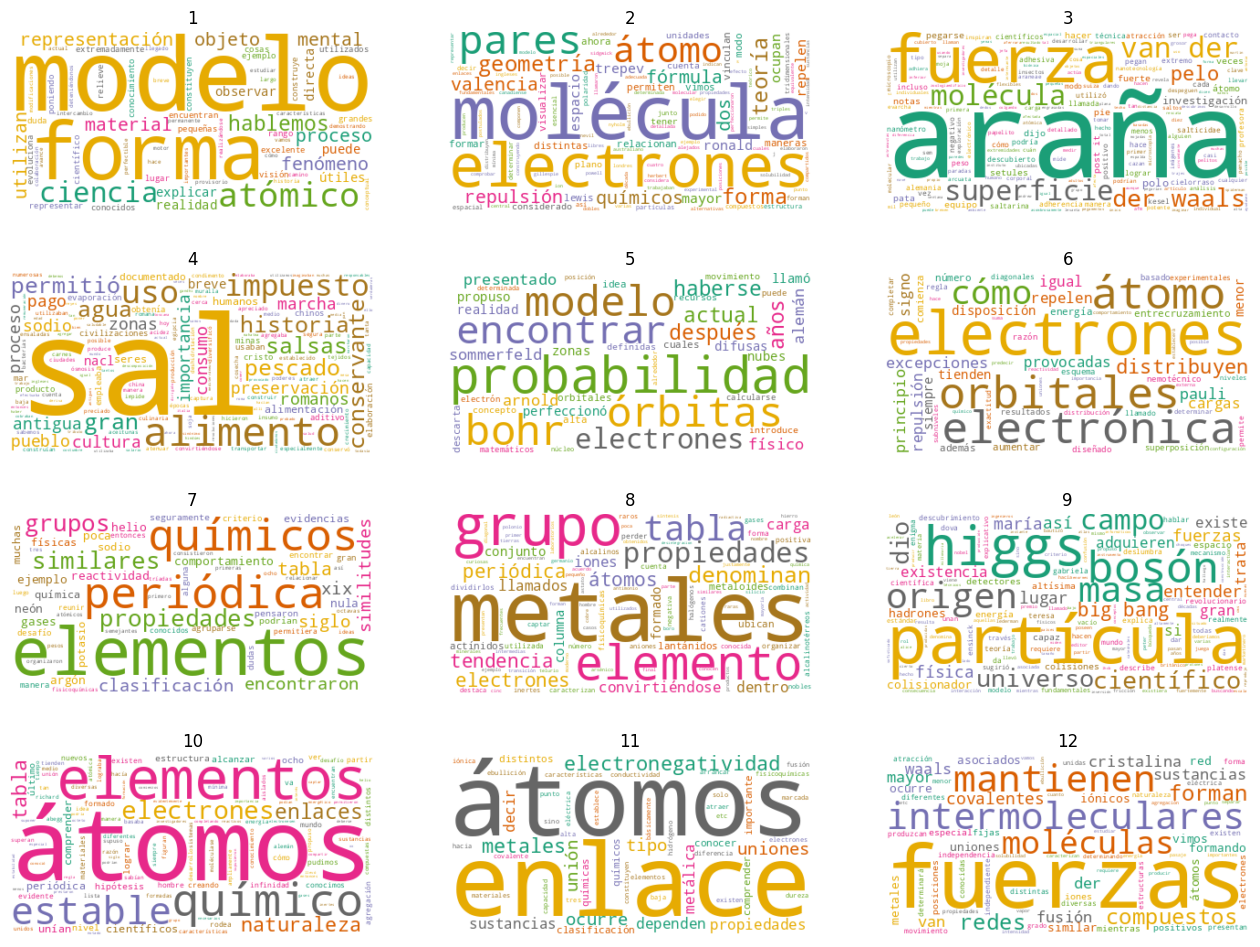

In [27]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]

anios = ['1','2','3','4','5','6','7','8','9','10','11','12']

# Create subplots for each anio
# for index, anio in enumerate(data.columns):
for index, anio in enumerate(data_clean.transcript.keys()):

    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])

plt.show()

# 5 - Análisis de Sentimiento
Ahora probaremos analizando los sentimientos en cuanto a “positivos y negativos” encontrados en el texto y sus cambios de polaridad. Usaremos la librería TextBlob sólo funciona con textos en inglés, por lo que primero vamos a  traducir el texto.

In [32]:
# Leeremos el corpus que aún preserva el orden de las palabras
import pandas as pd
data = pd.read_pickle('data_clean5.pkl')

# Agregamos un nuevo campo 'full_names' por si quisieramos agregar alguna info adicional a cada año
# Nuestro caso repetimos los años, nos servirá para alguna visualización
full_names = ['capitulo_1','capitulo_2','capitulo_3','capitulo_4','capitulo_5','capitulo_6','capitulo_7','capitulo_8','capitulo_9','capitulo_10','capitulo_11','capitulo_12']


data['full_name'] = full_names
data.transcript.astype(str)
data.head()


,transcript,full_name
1,hablemos de modelos un modelo una representación material o mental de un fenómeno un proceso o un objeto los modelos se utilizan para explicar un...,capitulo_1
10,la geometría de las moléculas como vimos los átomos se relacionan de distintas maneras para formar moléculas las fórmulas de lewis permiten visual...,capitulo_2
11,los científicos se inspiran en las araña para desarrollar nanotecnología los científicos han descubierto que la manera en que las araña se pegan a...,capitulo_3
12,breve historia de la sal nacl el uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizaciones ...,capitulo_4
2,el modelo actual unos años después de haberse presentado el modelo de bohr arnold sommerfeld físico alemán lo perfeccionó propuso que las órbitas ...,capitulo_5


## TRADUCCION DEL TEXTO.

Todos los modelos trabajan con texto en ingles por lo tanto debo traducir el texto a ingles.
En este caso voy a crear una funcion de traduccion con textblod.
Tambien existen otras librerias como google-cloud-translate

Para evitar problemas definir el lenguaje de entrada y el de salida por ejemplo en textblod `translate(to='en', from_lang='es')`

In [33]:
from textblob import TextBlob

# Definir la función de traducción a inglés
def translate_to_english(text):
        # Aplicar la traducción a inglés usando TextBlob Especificar el idioma de origen en el parametro from_lang
        print(text)
        result = TextBlob(text).translate(to='en', from_lang='es')
        print(result)
        return str(result)

## EJECUCION DE ANALISIS TETXBLOB
La polaridad es un valor numérico que indica la positividad o negatividad del texto. Un valor de polaridad cercano a 1 indica un sentimiento positivo, mientras que un valor cercano a -1 indica un sentimiento negativo. Un valor de polaridad cercano a 0 indica neutralidad.

La subjetividad es un valor numérico que indica la objetividad o subjetividad del texto. Un valor de subjetividad cercano a 0 indica que el texto es objetivo y se basa en hechos, mientras que un valor cercano a 1 indica que el texto es subjetivo y se basa en opiniones o juicios personales.

In [ ]:

# Aplicar la traducción a cada texto en la columna 'script'
data['blob_en'] = data['transcript'].apply(translate_to_english)
data['polarity'] = data['blob_en'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['blob_en'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [53]:
# Imprimir el resultado
print(data)

                                                                                                                                               transcript  \
1   hablemos de modelos un modelo  una representación material o mental de un fenómeno un proceso o un objeto los modelos se utilizan para explicar un...   
10  la geometría de las moléculas como vimos los átomos se relacionan de distintas maneras para formar moléculas las fórmulas de lewis permiten visual...   
11  los científicos se inspiran en las araña para desarrollar nanotecnología los científicos han descubierto que la manera en que las araña se pegan a...   
12  breve historia de la sal nacl el uso de la sal en la alimentación de los seres humanos está documentado en la historia de antiguas civilizaciones ...   
2   el modelo actual unos años después de haberse presentado el modelo de bohr arnold sommerfeld físico alemán lo perfeccionó propuso que las órbitas ...   
3   ¿cómo se distribuyen los electrones en los orbitales h

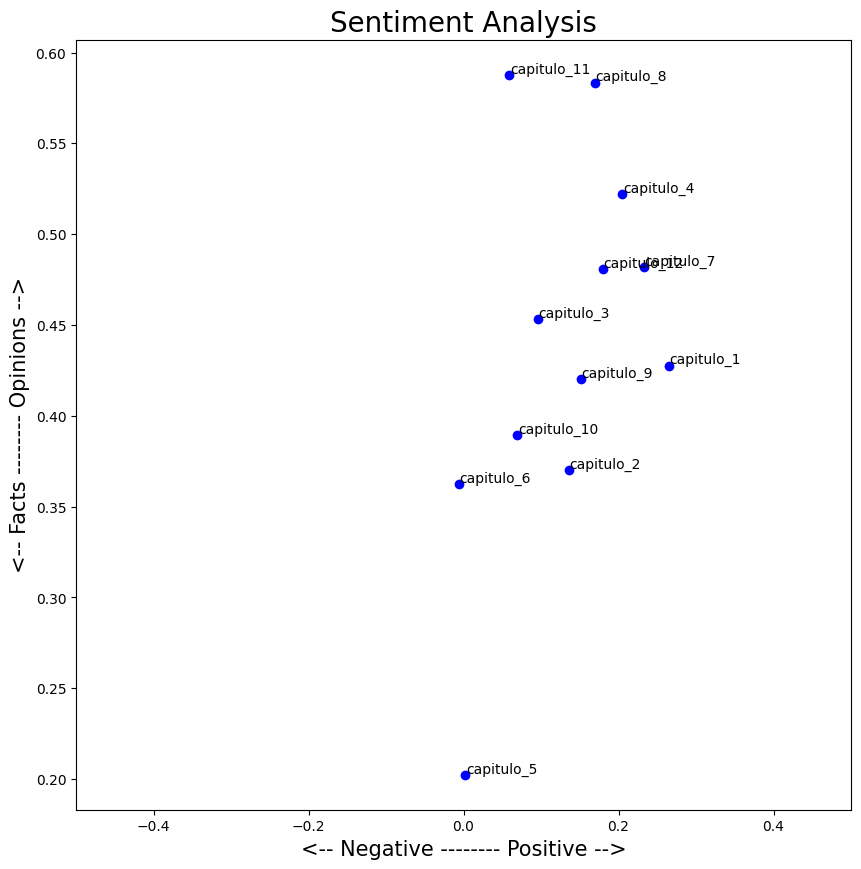

In [42]:
# Let's plot the results
full_names = ['capitulo_1','capitulo_2','capitulo_3','capitulo_4','capitulo_5','capitulo_6','capitulo_7','capitulo_8','capitulo_9','capitulo_10','capitulo_11','capitulo_12']

data['full_name'] = full_names

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,10]

for index, anio in enumerate(data.index):
  # TextBlod
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.5, 0.5)
  # NLTK
   # x = data.polarity_nltk.loc[anio] /100
    #y = 0.45
   # plt.scatter(x, y, color='red')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
   # plt.xlim(-0.5, 0.5)


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## EJECUCION DE ANALISIS NLTK - SentimentIntensityAnalyzer



In [54]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
# Crear un objeto SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Obtener la polaridad del texto
data['polarity_nltk'] = data['blob_en'].apply(lambda x: sia.polarity_scores(x)['compound'])


# Imprimir la polaridad
print("Polaridad:", data['polarity_nltk'])

Polaridad: 1     0.9600
10    0.9382
11    0.9928
12    0.9855
2     0.0258
3     0.5994
4     0.8074
5     0.4215
6     0.9879
7     0.9799
8     0.5849
9     0.9390
Name: polarity_nltk, dtype: float64


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


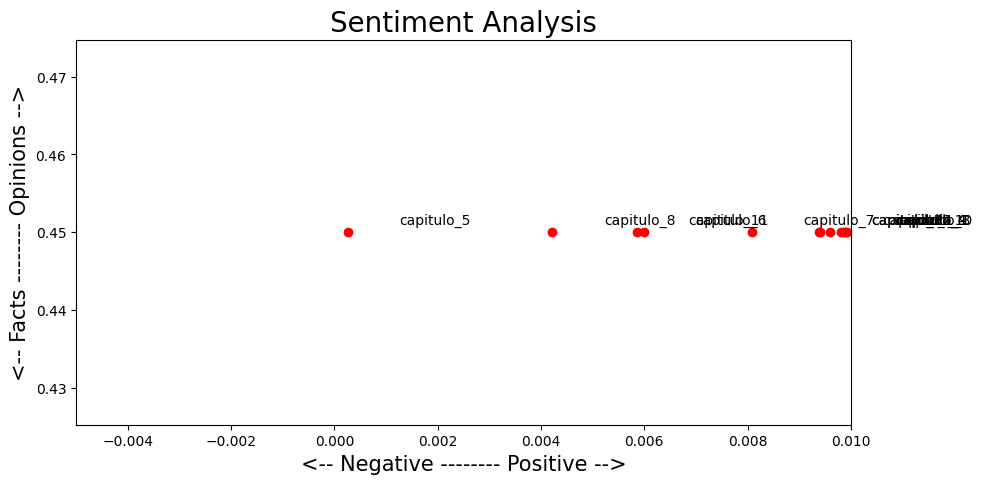

In [57]:
full_names = ['capitulo_1','capitulo_2','capitulo_3','capitulo_4','capitulo_5','capitulo_6','capitulo_7','capitulo_8','capitulo_9','capitulo_10','capitulo_11','capitulo_12']

data['full_name'] = full_names

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,5]

for index, anio in enumerate(data.index):
  # TextBlod
    #x = data.polarity.loc[anio]
    #y = data.subjectivity.loc[anio]
    #plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    #plt.xlim(-0.5, 0.5)
  # NLTK
    x = data.polarity_nltk.loc[anio]/100
    y = 0.45
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.005, 0.01)


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()